<a href="https://colab.research.google.com/github/greasyfinger/Student-Success-Prediction/blob/main/predict_student_success.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Library Import

In [ ]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

In [ ]:
!pip install lazypredict
!pip uninstall pandas-profiling

In [ ]:
from lazypredict.Supervised import LazyClassifier
from ydata_profiling import ProfileReport

## Exploratory Data Analysis

In [ ]:
dataset = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vQb-a74RnwOvsbDmTw9IHhUl98nBpxbYQuu6FcrSai0hxv-zT1cqODHgkj7aLctw4XC8M-JGOumcm8s/pub?output=csv")
df = dataset.copy()

In [ ]:
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.00,0,10.80,1.40,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.67,0,13.90,-0.30,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.00,0,10.80,1.40,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.40,0,9.40,-0.80,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.00,0,13.90,-0.30,0.79,Graduate


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 35 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Nacionality                                     4424 non-null   int64  
 7   Mother's qualification                          4424 non-null   int64  
 8   Father's qualification                          4424 non-null   int64  
 9   Mother's occupation                      

Preprocessing: Rename columns

In [ ]:
df.rename(columns={'Nacionality': 'Nationality'}, inplace=True)

In [ ]:
df.describe(include='all')

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nationality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
count,4424.00,4424.00,4424.00,4424.00,4424.00,4424.00,4424.00,4424.00,4424.00,4424.00,...,4424.00,4424.00,4424.00,4424.00,4424.00,4424.00,4424.00,4424.00,4424.00,4424
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Graduate
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2209
mean,1.18,6.89,1.73,9.90,0.89,2.53,1.25,12.32,16.46,7.32,...,0.54,6.23,8.06,4.44,10.23,0.15,11.57,1.23,0.00,NaN
std,0.61,5.30,1.31,4.33,0.31,3.96,1.75,9.03,11.04,4.00,...,1.92,2.20,3.95,3.01,5.21,0.75,2.66,1.38,2.27,NaN
min,1.00,1.00,0.00,1.00,0.00,1.00,1.00,1.00,1.00,1.00,...,0.00,0.00,0.00,0.00,0.00,0.00,7.60,-0.80,-4.06,NaN
25%,1.00,1.00,1.00,6.00,1.00,1.00,1.00,2.00,3.00,5.00,...,0.00,5.00,6.00,2.00,10.75,0.00,9.40,0.30,-1.70,NaN
50%,1.00,8.00,1.00,10.00,1.00,1.00,1.00,13.00,14.00,6.00,...,0.00,6.00,8.00,5.00,12.20,0.00,11.10,1.40,0.32,NaN
75%,1.00,12.00,2.00,13.00,1.00,1.00,1.00,22.00,27.00,10.00,...,0.00,7.00,10.00,6.00,13.33,0.00,13.90,2.60,1.79,NaN


In [ ]:
df_report = ProfileReport(df, title = "student_dropout dataset" ,html={'style':{'full_width':True}})
df_report

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
df_report.to_file(output_file="REPORT.html")

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
fig = px.histogram(df, x="Target", color="Target")

fig.update_layout(
    width=600,
    height=600,
)
fig.show()

Preprocessing: create a custom label encoder for Target

In [ ]:
df['Target'] = df['Target'].map({'Dropout':0,'Enrolled':-1,'Graduate':1})
df["Target"]

0       0
1       1
2       0
3       1
4       1
       ..
4419    1
4420    0
4421    0
4422    1
4423    1
Name: Target, Length: 4424, dtype: int64

In [ ]:
crr = df.corr()['Target'].drop('Target')
tp_11 = crr.abs().nlargest(11).index
tp_crr = crr[tp_11]

crr_df = pd.DataFrame({'Features': tp_11, 'Correlation': tp_crr})

fig = px.bar(
    crr_df,
    x='Features',
    y='Correlation',
    title='Features with higest correlation with Target ',
)

fig.update_layout(
    xaxis_title='Features',
    yaxis_title='Correlation with Target',
    xaxis_tickangle=45,
    bargap=0.2,
    width=800,
    height=800,
)
fig.show()

In [ ]:
df_cnd = df[tp_11]
df_cnd["Target"] = df["Target"]
df_cnd.head()

,Curricular units 2nd sem (approved),Curricular units 1st sem (approved),Curricular units 2nd sem (grade),Curricular units 1st sem (grade),Scholarship holder,Tuition fees up to date,Gender,Curricular units 2nd sem (enrolled),Application mode,Debtor,Curricular units 1st sem (enrolled),Target
0,0,0,0.00,0.00,0,1,1,0,8,0,0,0
1,6,6,13.67,14.00,0,0,1,6,6,0,6,1
2,0,0,0.00,0.00,0,0,1,6,1,0,6,0
3,5,6,12.40,13.43,0,1,0,6,8,0,6,1
4,6,5,13.00,12.33,0,1,0,6,12,0,6,1


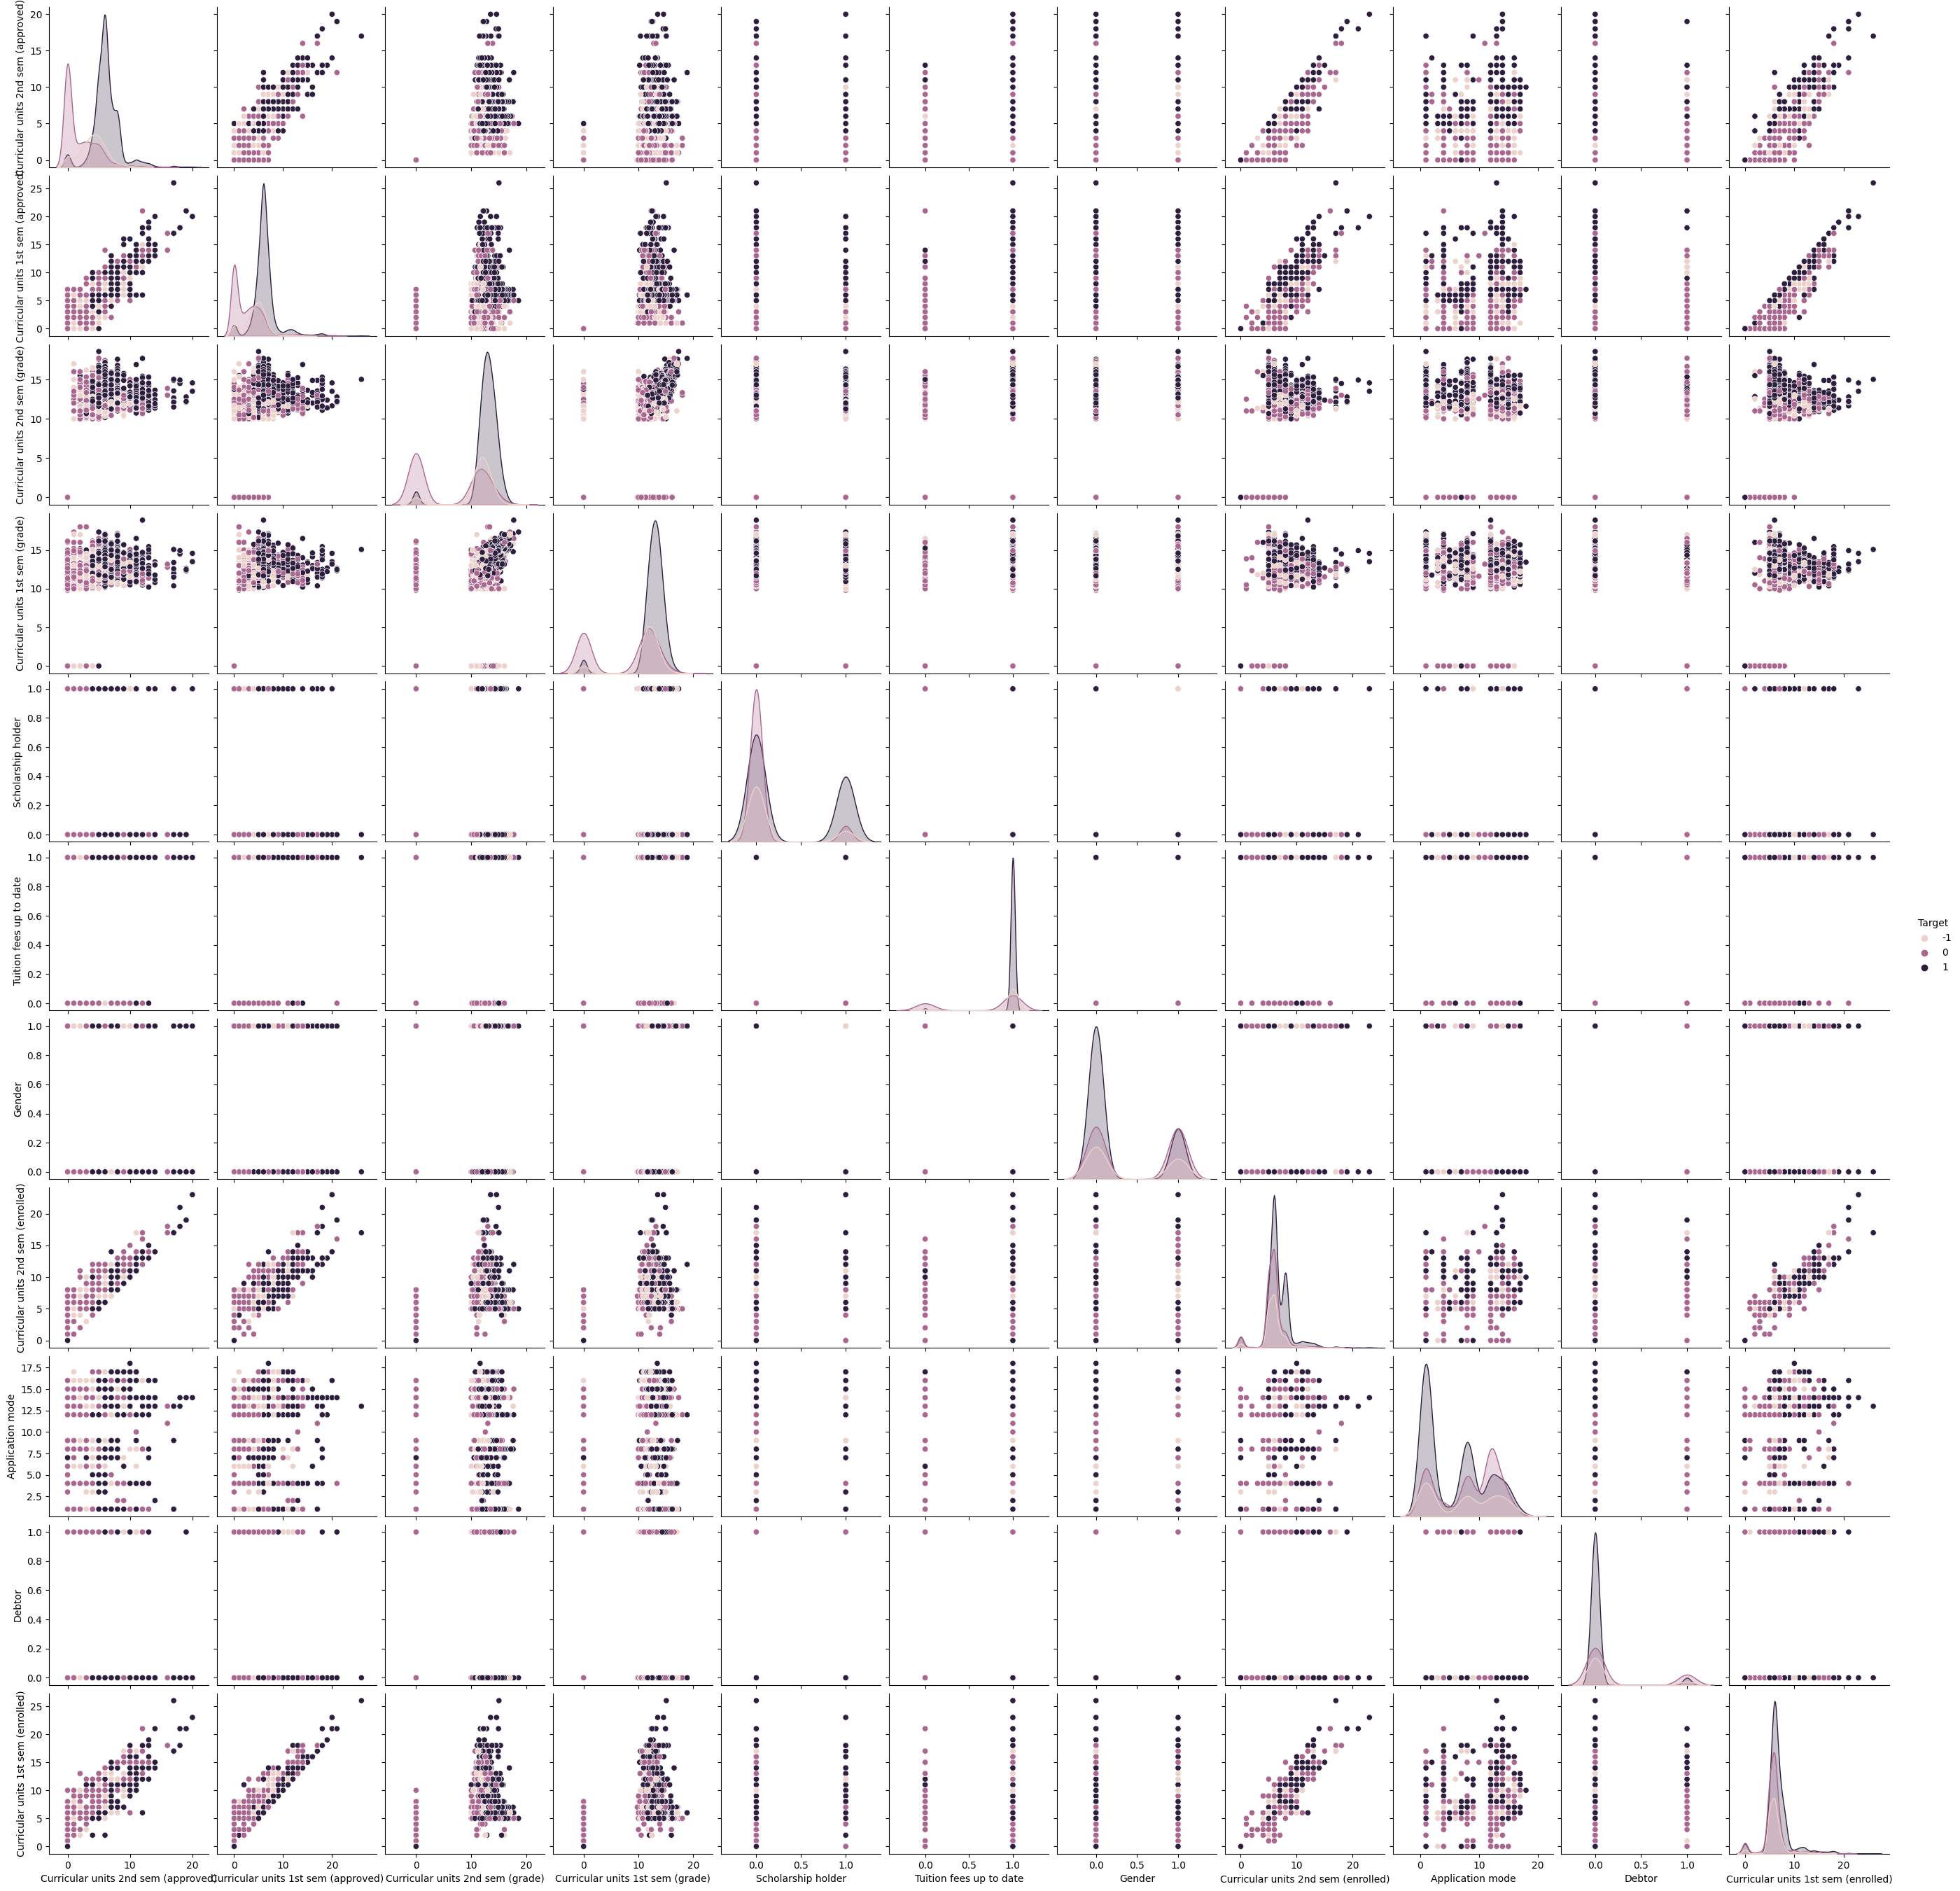

In [ ]:
pairplt = sns.pairplot(df_cnd, hue='Target')
plt.show()

In [ ]:
spx = [[{'type':'domain'}] * 2] * 1
fig = make_subplots(rows=1, cols=2, specs=spx,  subplot_titles=("Dropout - Graduate ratio in females", "Dropout - Graduate ratio in males"))

fml = df[(df['Gender'] == 0) & (df['Target'] != -1)]
x = fml['Target'].value_counts().index
y = fml['Target'].value_counts().values

t_df = pd.DataFrame({'x': x,'y' : y})

fig.add_trace(px.pie(t_df,
             names ='x',
             values ='y').data[0] , row=1, col=1)

ml = df[(df['Gender'] == 1) & (df['Target'] != -1)]
x = ml['Target'].value_counts().index
y = ml['Target'].value_counts().values

t_df = pd.DataFrame({'x': x,'y' : y})

fig.add_trace(px.pie(t_df,
             names ='x',
             values ='y').data[0], row=1, col=2)

fig.update_traces(labels=['Graduate', 'Dropout'], hole=0.4, textinfo='percent+label', pull=[0, 0.2, 0.1])
fig.show()

In [ ]:
spx = [[{'type':'domain'}] * 3] * 2
fig = make_subplots(rows=2, cols=3, specs=spx,  subplot_titles=("single", "married", "widower", "divorced", "facto union", "legally separated"))

chk = df[(df['Marital status'] == 1) & (df['Target'] != -1)]
x = chk['Target'].value_counts().index
y = chk['Target'].value_counts().values

t_df = pd.DataFrame({'x': x,'y' : y})

fig.add_trace(px.pie(t_df,
             names ='x',
             values ='y').data[0] , row=1, col=1)

chk = df[(df['Marital status'] == 2) & (df['Target'] != -1)]
x = chk['Target'].value_counts().index
y = chk['Target'].value_counts().values

t_df = pd.DataFrame({'x': x,'y' : y})

fig.add_trace(px.pie(t_df,
             names ='x',
             values ='y').data[0] , row=1, col=2)

chk = df[(df['Marital status'] == 3) & (df['Target'] != -1)]
x = chk['Target'].value_counts().index
y = chk['Target'].value_counts().values

t_df = pd.DataFrame({'x': x,'y' : y})

fig.add_trace(px.pie(t_df,
             names ='x',
             values ='y').data[0] , row=1, col=3)

chk = df[(df['Marital status'] == 4) & (df['Target'] != -1)]
x = chk['Target'].value_counts().index
y = chk['Target'].value_counts().values

t_df = pd.DataFrame({'x': x,'y' : y})

fig.add_trace(px.pie(t_df,
             names ='x',
             values ='y').data[0] , row=2, col=1)

chk = df[(df['Marital status'] == 5) & (df['Target'] != -1)]
x = chk['Target'].value_counts().index
y = chk['Target'].value_counts().values

t_df = pd.DataFrame({'x': x,'y' : y})

fig.add_trace(px.pie(t_df,
             names ='x',
             values ='y').data[0] , row=2, col=2)

chk = df[(df['Marital status'] == 6) & (df['Target'] != -1)]
x = fml['Target'].value_counts().index
y = fml['Target'].value_counts().values

t_df = pd.DataFrame({'x': x,'y' : y})

fig.add_trace(px.pie(t_df,
             names ='x',
             values ='y').data[0] , row=2, col=3)

fig.update_traces(labels=['Graduate', 'Dropout'], hole=0.4, textinfo='percent+label', pull=[0, 0.2, 0.1])
fig.show()

In [ ]:
spx = [[{'type':'domain'}] * 2] * 5
fig = make_subplots(rows=5, cols=2, specs=spx,  subplot_titles=("attendace - Day Time", " attendance - Evening", "debtor - yes", " debtor - no", "special needs - yes", "special needs - no", "displaced - yes", "displaced - no", "scholar - yes", "scholar - no"))

#Attendance
chk = df[(df['Daytime/evening attendance'] == 1) & (df['Target'] != -1)]
x = chk['Target'].value_counts().index
y = chk['Target'].value_counts().values

t_df = pd.DataFrame({'x': x,'y' : y})

fig.add_trace(px.pie(t_df,
             names ='x',
             values ='y').data[0] , row=1, col=1)

chk = df[(df['Daytime/evening attendance'] == 0) & (df['Target'] != -1)]
x = chk['Target'].value_counts().index
y = chk['Target'].value_counts().values

t_df = pd.DataFrame({'x': x,'y' : y})

fig.add_trace(px.pie(t_df,
             names ='x',
             values ='y').data[0] , row=1, col=2)

#Debtor
chk = df[(df['Debtor'] == 1) & (df['Target'] != -1)]
x = chk['Target'].value_counts().index
y = chk['Target'].value_counts().values

t_df = pd.DataFrame({'x': x,'y' : y})

fig.add_trace(px.pie(t_df,
             names ='x',
             values ='y').data[0] , row=2, col=1)

chk = df[(df['Debtor'] == 0) & (df['Target'] != -1)]
x = chk['Target'].value_counts().index
y = chk['Target'].value_counts().values

t_df = pd.DataFrame({'x': x,'y' : y})

fig.add_trace(px.pie(t_df,
             names ='x',
             values ='y').data[0] , row=2, col=2)

#Debtor
chk = df[(df['Debtor'] == 1) & (df['Target'] != -1)]
x = chk['Target'].value_counts().index
y = chk['Target'].value_counts().values

t_df = pd.DataFrame({'x': x,'y' : y})

fig.add_trace(px.pie(t_df,
             names ='x',
             values ='y').data[0] , row=2, col=1)

chk = df[(df['Debtor'] == 0) & (df['Target'] != -1)]
x = chk['Target'].value_counts().index
y = chk['Target'].value_counts().values

t_df = pd.DataFrame({'x': x,'y' : y})

fig.add_trace(px.pie(t_df,
             names ='x',
             values ='y').data[0] , row=2, col=2)

#Special Needs
chk = df[(df['Educational special needs'] == 1) & (df['Target'] != -1)]
x = chk['Target'].value_counts().index
y = chk['Target'].value_counts().values

t_df = pd.DataFrame({'x': x,'y' : y})

fig.add_trace(px.pie(t_df,
             names ='x',
             values ='y').data[0] , row=3, col=1)

chk = df[(df['Educational special needs'] == 0) & (df['Target'] != -1)]
x = chk['Target'].value_counts().index
y = chk['Target'].value_counts().values

t_df = pd.DataFrame({'x': x,'y' : y})

fig.add_trace(px.pie(t_df,
             names ='x',
             values ='y').data[0] , row=3, col=2)

#Displaced
chk = df[(df['Displaced'] == 1) & (df['Target'] != -1)]
x = chk['Target'].value_counts().index
y = chk['Target'].value_counts().values

t_df = pd.DataFrame({'x': x,'y' : y})

fig.add_trace(px.pie(t_df,
             names ='x',
             values ='y').data[0] , row=4, col=1)

chk = df[(df['Displaced'] == 0) & (df['Target'] != -1)]
x = chk['Target'].value_counts().index
y = chk['Target'].value_counts().values

t_df = pd.DataFrame({'x': x,'y' : y})

fig.add_trace(px.pie(t_df,
             names ='x',
             values ='y').data[0] , row=4, col=2)

#Scholarship holder
chk = df[(df['Scholarship holder'] == 1) & (df['Target'] != -1)]
x = chk['Target'].value_counts().index
y = chk['Target'].value_counts().values

t_df = pd.DataFrame({'x': x,'y' : y})

fig.add_trace(px.pie(t_df,
             names ='x',
             values ='y').data[0] , row=5, col=1)

chk = df[(df['Scholarship holder'] == 0) & (df['Target'] != -1)]
x = chk['Target'].value_counts().index
y = chk['Target'].value_counts().values

t_df = pd.DataFrame({'x': x,'y' : y})

fig.add_trace(px.pie(t_df,
             names ='x',
             values ='y').data[0] , row=5, col=2)

fig.update_traces(labels=['Graduate', 'Dropout'], hole=0.4, textinfo='percent+label', pull=[0, 0.2, 0.1])
fig.update_layout(
    width=800,
    height=1600
)

fig.show()

In [ ]:
t_df = df.copy()
age_ranges = [15, 20, 25, 30, 35, 40, 50, 60, 100]
t_df['Age Interval'] = pd.cut(t_df['Age at enrollment'], bins=age_ranges).astype(str)

p_df = pd.pivot_table(t_df, index='Age Interval', columns='Target', values='Age at enrollment', aggfunc='count', fill_value=0).reset_index()

p_df['Total'] = p_df[-1] + p_df[0] + p_df[1]

p_df['Enrolled'] = (p_df[-1] / p_df['Total']) * 100
p_df['Dropped out'] = (p_df[0] / p_df['Total']) * 100
p_df['Graduated'] = (p_df[1] / p_df['Total']) * 100

fig = px.bar(p_df, x='Age Interval', y=['Enrolled', 'Dropped out', 'Graduated'], barmode='stack')

fig.update_layout(
    title='Stacked Bar Plot of Target Percentage by Age Interval',
    xaxis_title='Age Interval',
    yaxis_title='Percentage',
)

fig.show()

In [ ]:
categ = ['Marital status', 'Application mode', 'Application order', 'Course', 'Daytime/evening attendance',
          'Previous qualification', 'Nationality', "Mother's qualification", "Father's qualification",
          "Mother's occupation", "Father's occupation", 'Displaced', 'Educational special needs', 'Debtor',
          'Tuition fees up to date', 'Gender', 'Scholarship holder', 'International']

conti = ['Age at enrollment', 'Curricular units 1st sem (credited)', 'Curricular units 1st sem (enrolled)',
             'Curricular units 1st sem (evaluations)', 'Curricular units 1st sem (approved)',
             'Curricular units 1st sem (grade)', 'Curricular units 1st sem (without evaluations)',
             'Curricular units 2nd sem (credited)', 'Curricular units 2nd sem (enrolled)',
             'Curricular units 2nd sem (evaluations)', 'Curricular units 2nd sem (approved)',
             'Curricular units 2nd sem (grade)', 'Curricular units 2nd sem (without evaluations)',
             'Unemployment rate', 'Inflation rate', 'GDP']


## Classification

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay, confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from xgboost import XGBClassifier

In [ ]:
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.00,0,10.80,1.40,1.74,0
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.67,0,13.90,-0.30,0.79,1
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.00,0,10.80,1.40,1.74,0
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.40,0,9.40,-0.80,-3.12,1
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.00,0,13.90,-0.30,0.79,1


In [ ]:
pdf = df[df['Target'] != -1]
X = pdf.drop('Target' ,axis = 1)
y = pdf['Target']

scaler = StandardScaler()
scaler = MinMaxScaler()
scaler.fit(X[conti])

X[conti] = scaler.transform(X[conti])
X[conti].head()

,Age at enrollment,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
0,0.06,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.37,0.49,0.77
1,0.04,0.00,0.23,0.13,0.23,0.74,0.00,0.00,0.26,0.18,0.30,0.74,0.00,0.73,0.11,0.64
2,0.04,0.00,0.23,0.00,0.00,0.00,0.00,0.00,0.26,0.00,0.00,0.00,0.00,0.37,0.49,0.77
3,0.06,0.00,0.23,0.18,0.23,0.71,0.00,0.00,0.26,0.30,0.25,0.67,0.00,0.21,0.00,0.12
4,0.53,0.00,0.23,0.20,0.19,0.65,0.00,0.00,0.26,0.18,0.30,0.70,0.00,0.73,0.11,0.64


In [ ]:
data = X
labels = y

tsne = TSNE(n_components=2, random_state=0)
projections = tsne.fit_transform(data)

fig = px.scatter(
    projections, x=0, y=1,
    color=labels
)
fig.show()

In [ ]:
data = X
labels = y

tsne = TSNE(n_components=3, random_state=0)
projections = tsne.fit_transform(data)

fig = px.scatter_3d(
    projections, x=0, y=1, z=2,
    color = labels
)
fig.update_traces(marker_size=8)
fig.show()

In [ ]:
fs = SelectKBest(score_func=f_classif, k=15)
fs.fit_transform(X, y)
fltr_cols = fs.get_support()
best_ftr = X.columns[:][fltr_cols]
X = X[best_ftr]
X.head()

,Application mode,Previous qualification,Displaced,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,Curricular units 1st sem (enrolled),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade)
0,8,1,1,0,1,1,0,0.06,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,6,1,1,0,0,1,0,0.04,0.23,0.23,0.74,0.26,0.18,0.30,0.74
2,1,1,1,0,0,1,0,0.04,0.23,0.00,0.00,0.26,0.00,0.00,0.00
3,8,1,1,0,1,0,0,0.06,0.23,0.23,0.71,0.26,0.30,0.25,0.67
4,12,1,0,0,1,0,0,0.53,0.23,0.19,0.65,0.26,0.18,0.30,0.70


In [ ]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=accuracy_score)
models, preds = clf.fit(X_train, X_test, y_train, y_test)
models

100%|██████████| 29/29 [00:06<00:00,  4.46it/s]

[LightGBM] [Info] Number of positive: 1760, number of negative: 1144
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000728 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 702
[LightGBM] [Info] Number of data points in the train set: 2904, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.606061 -> initscore=0.430783
[LightGBM] [Info] Start training from score 0.430783


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,accuracy_score,Time Taken
Model,,,,,,
SGDClassifier,0.91,0.90,0.90,0.91,0.91,0.06
LinearSVC,0.91,0.90,0.90,0.91,0.91,0.31
CalibratedClassifierCV,0.91,0.89,0.89,0.91,0.91,0.60
LogisticRegression,0.91,0.89,0.89,0.91,0.91,0.10
LGBMClassifier,0.90,0.89,0.89,0.90,0.90,0.21
XGBClassifier,0.90,0.89,0.89,0.90,0.90,0.18
ExtraTreesClassifier,0.90,0.89,0.89,0.90,0.90,0.35
SVC,0.90,0.88,0.88,0.90,0.90,0.43
AdaBoostClassifier,0.90,0.88,0.88,0.90,0.90,0.21


In [ ]:
pdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3630 entries, 0 to 4423
Data columns (total 35 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  3630 non-null   int64  
 1   Application mode                                3630 non-null   int64  
 2   Application order                               3630 non-null   int64  
 3   Course                                          3630 non-null   int64  
 4   Daytime/evening attendance                      3630 non-null   int64  
 5   Previous qualification                          3630 non-null   int64  
 6   Nacionality                                     3630 non-null   int64  
 7   Mother's qualification                          3630 non-null   int64  
 8   Father's qualification                          3630 non-null   int64  
 9   Mother's occupation                      

### Logistic Regression

In [ ]:
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga'],
    'max_iter': [100, 200, 300],
}


In [ ]:
model = GridSearchCV(estimator = LogisticRegression(), param_grid = param_grid, cv=5, scoring='accuracy')
model.fit(X, y)
y_pred = model.predict(X)
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.83      0.88      1421
           1       0.90      0.96      0.93      2209

    accuracy                           0.91      3630
   macro avg       0.92      0.90      0.90      3630
weighted avg       0.91      0.91      0.91      3630



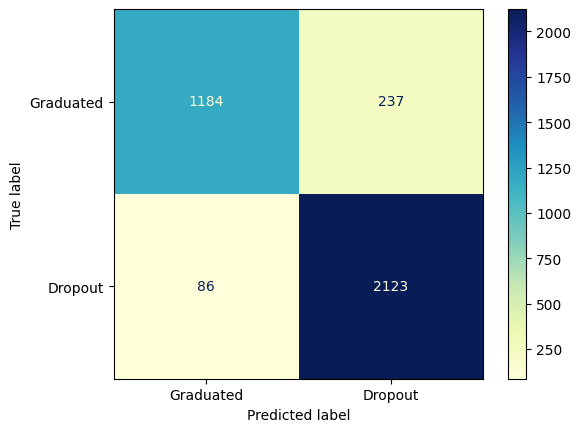

In [ ]:
cfm = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y, y_pred), display_labels=['Graduated', 'Dropout'])
cfm.plot(cmap = 'YlGnBu')

### SVM

In [ ]:
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'degree': [2, 3, 4],
    'gamma': ['scale', 'auto']
}

In [ ]:
model = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy')
model.fit(X, y)
y_pred = model.predict(X)
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.81      0.88      1421
           1       0.89      0.97      0.93      2209

    accuracy                           0.91      3630
   macro avg       0.92      0.89      0.90      3630
weighted avg       0.91      0.91      0.91      3630



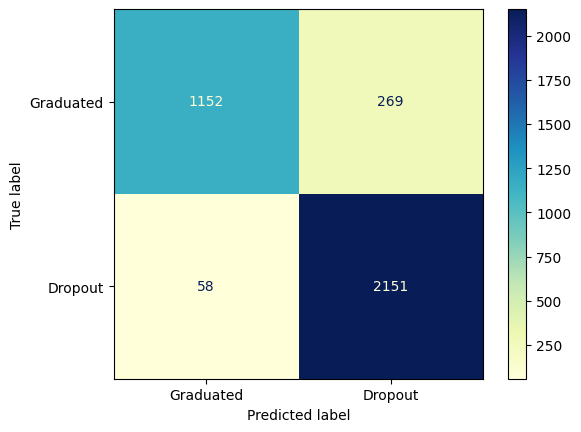

In [ ]:
cfm = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y, y_pred), display_labels=['Graduated', 'Dropout'])
cfm.plot(cmap = 'YlGnBu')

### Naive Bias

In [ ]:
param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]
}

In [ ]:
model = GridSearchCV(GaussianNB(), param_grid, cv=5, scoring='accuracy')
model.fit(X, y)
y_pred = model.predict(X)
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.74      0.80      1421
           1       0.85      0.93      0.88      2209

    accuracy                           0.85      3630
   macro avg       0.86      0.83      0.84      3630
weighted avg       0.85      0.85      0.85      3630



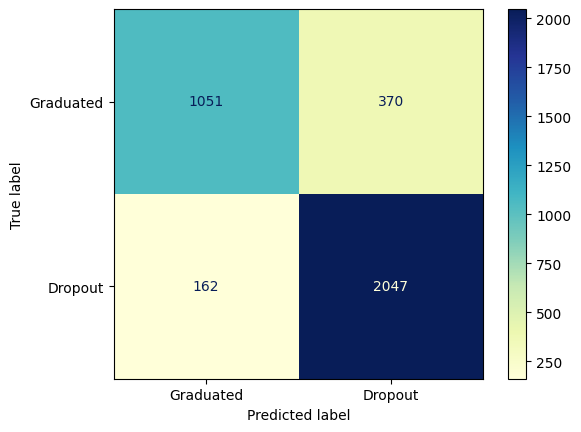

In [ ]:
cfm = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y, y_pred), display_labels=['Graduated', 'Dropout'])
cfm.plot(cmap = 'YlGnBu')